## Marketing Analytics- E-commerce Customers

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('2019-Nov.csv')

In [6]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [11]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...
67501974,2019-11-30 23:59:58 UTC,view,15700137,2053013559733912211,NaN,NaN,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
67501975,2019-11-30 23:59:58 UTC,view,28719425,2053013565639492569,apparel.shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
67501976,2019-11-30 23:59:59 UTC,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
67501977,2019-11-30 23:59:59 UTC,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [15]:
df['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

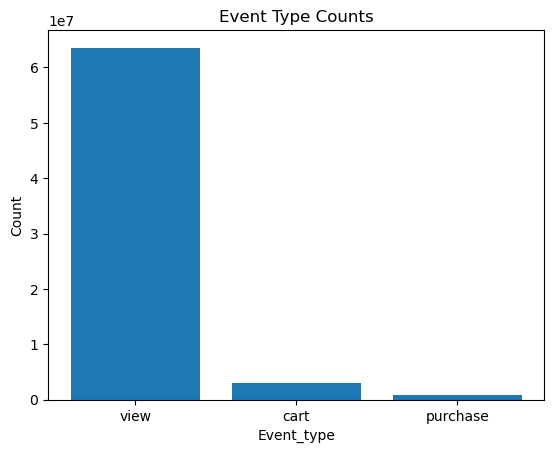

In [19]:

eventtype_counts = df['event_type'].value_counts()

# Drawing a Bar Chart with Matplotlib

plt.bar(eventtype_counts.index, eventtype_counts.values)
plt.xlabel('Event_type')
plt.ylabel('Count')
plt.title('Event Type Counts')
plt.show()


### Analysis:
We can see that there are overwhelmingly many website views, while adding items to the cart or completing a purchase is comparatively rare.

## Category (Item) Analysis

In [24]:
df['category_code'].unique()

array(['electronics.smartphone', 'appliances.sewing_machine', nan,
       'appliances.kitchen.washer', 'computers.notebook',
       'furniture.living_room.sofa', 'appliances.kitchen.refrigerators',
       'furniture.kitchen.chair', 'appliances.kitchen.dishwasher',
       'electronics.audio.headphone', 'appliances.environment.vacuum',
       'appliances.environment.water_heater', 'electronics.camera.video',
       'electronics.clocks', 'electronics.video.tv', 'apparel.tshirt',
       'apparel.jeans', 'construction.tools.drill',
       'auto.accessories.compressor', 'computers.components.motherboard',
       'computers.peripherals.printer', 'computers.desktop',
       'auto.accessories.player', 'accessories.bag',
       'computers.components.videocards', 'furniture.bedroom.bed',
       'furniture.bathroom.bath', 'electronics.audio.subwoofer',
       'construction.tools.welding', 'construction.tools.saw',
       'furniture.kitchen.table', 'apparel.shoes',
       'construction.tools.light'

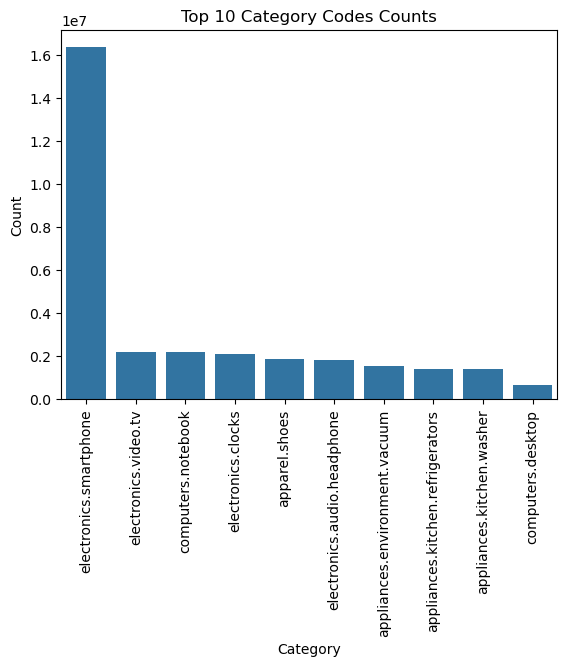

In [31]:
top_category_codes = df['category_code'].value_counts().head(10)

# New DataFrame 
top_category_codes_df = pd.DataFrame({'category_code': top_category_codes.index, 'count': top_category_codes.values})

# Drawing a Bar Chart with Seaborn
sns.barplot(x='category_code', y='count', data=top_category_codes_df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 10 Category Codes Counts')
plt.xticks(rotation=90)
plt.show()


### Analysis
The item that drew the most interest was smartphones among electronic devices. Other appliances—computers, vacuum cleaners, and refrigerators also ranked highly. Among non-device items, only shoes made the top 10.

So, what are the top 10 items not just by views but by those that actually progressed all the way to cart and purchase?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23476\4099595983.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


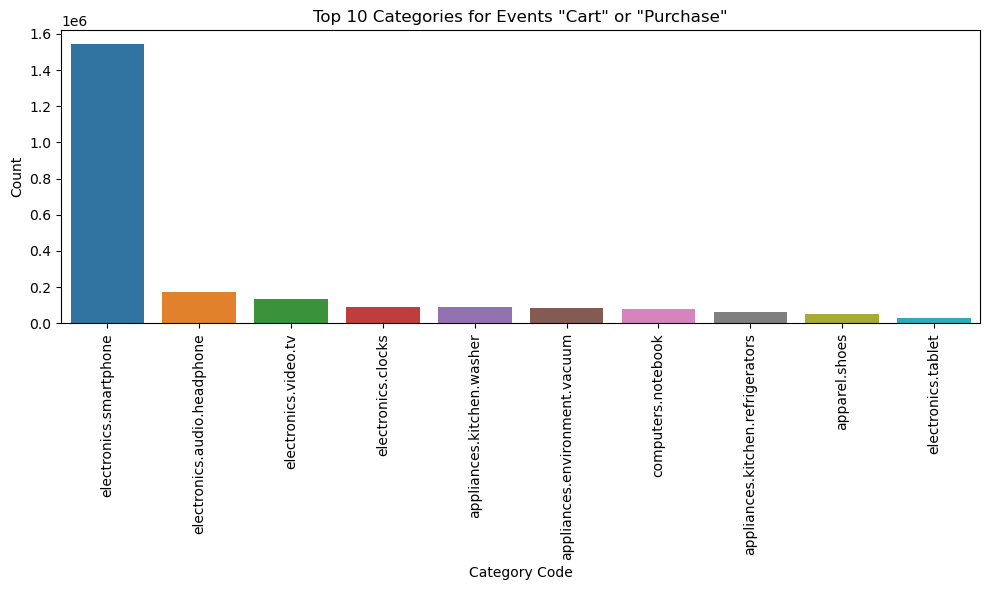

In [38]:
# Row filtering
filtered_df = df[df['event_type'].isin(['cart', 'purchase'])]

# Get the top 10 category_code values from the filtered DataFrame
top_codes = filtered_df['category_code'].value_counts().head(10)

# Build a new DataFrame for plotting
top_codes_df = pd.DataFrame({
    'category_code': top_codes.index,
    'count': top_codes.values
})

# Draw the bar chart

plt.figure(figsize=(10, 6))

# choose a palette with as many colors as you have bars
palette = sns.color_palette("tab10", n_colors=len(top_codes_df))

ax = sns.barplot(
    x='category_code',
    y='count',
    data=top_codes_df,
    palette=palette
)

ax.set_xlabel('Category Code')
ax.set_ylabel('Count')
ax.set_title('Top 10 Categories for Events "Cart" or "Purchase"')

# rotate before showing
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Analysis
- Once again, smartphones claim the overwhelming No. 1 spot. For smartphones, the conversion rate from view to add-to-cart or purchase is higher than for any other category.

- A quick check of September 2019 news shows that both the iPhone 11 and iPhone 11 Pro Max launched that month, and Samsung released the Galaxy Note 10 Plus in August. With these major device launches in the second half of the year, it’s no surprise interest spiked.

- All the other top categories only shifted positions slightly, but the 10th spot moved from “desktop” to “tablet.” Desktops tend to be researched online but bought in-store more often than other items, which likely explains why desktop dropped out of the cart/purchase top 10.

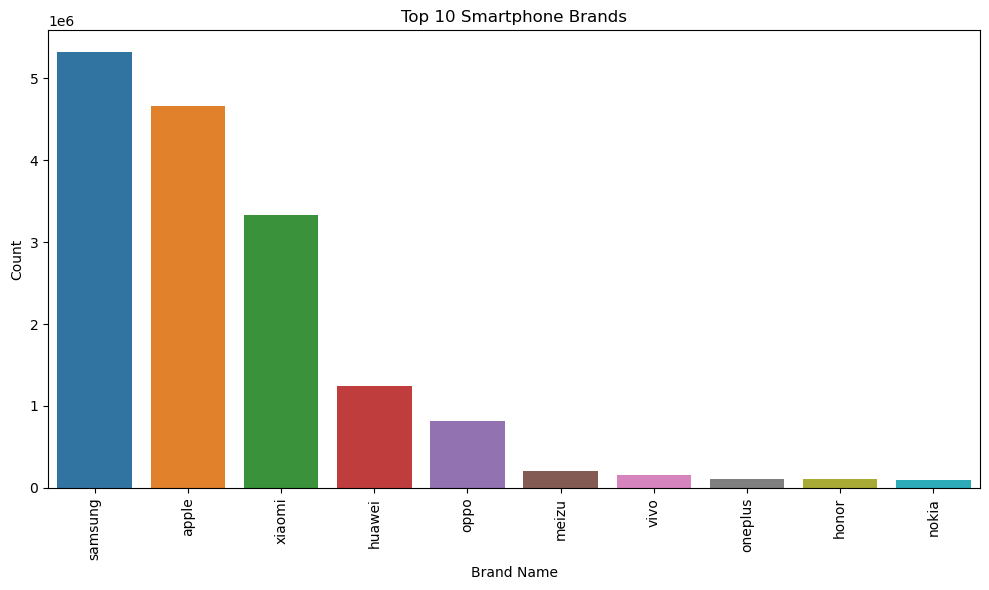

In [43]:
# Which smartphone brands were hottest?

# Row filtering
filtered_df = df[df['category_code'].isin(['electronics.smartphone'])]

# Get the top 10 brands from the filtered DataFrame
top_brands = filtered_df['brand'].value_counts().head(10)

# Build a new DataFrame for plotting
top_brands_df = pd.DataFrame({
    'brand': top_brands.index,
    'count': top_brands.values
})

# Draw the bar chart 
plt.figure(figsize=(10, 6))
sns.barplot(
    x='brand',
    y='count',
    hue='brand',      # map each bar to its own hue
    data=top_brands_df,
    palette='tab10',
    dodge=False       # prevents bars from splitting
)
plt.legend([],[], frameon=False)  # hide the legend
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.title('Top 10 Smartphone Brands')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Analysis
The data reveal that Samsung, Apple, and Xiaomi occupy the top positions. Notably, despite widespread assumptions of Apple’s global dominance, Samsung’s leading placement underscores a more nuanced market dynamic

## Customer Analysis

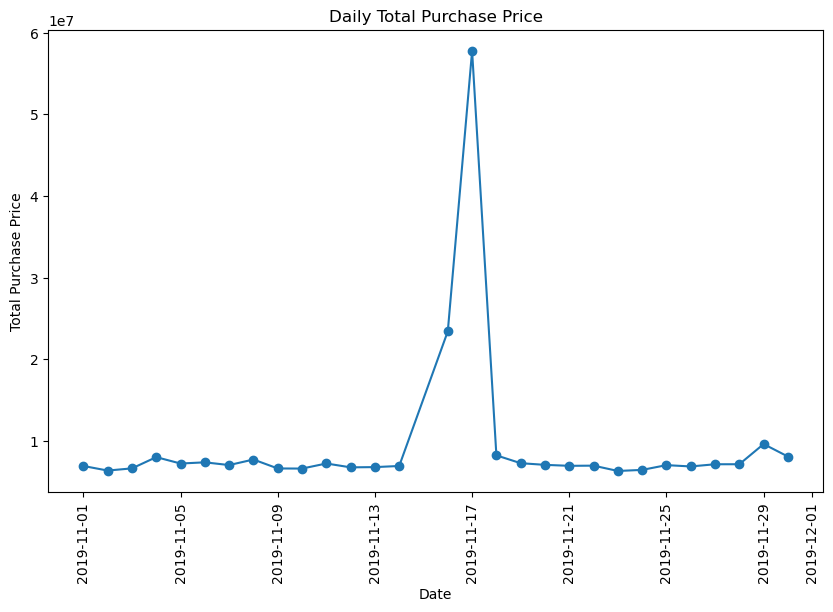

In [49]:
# Filter for 'purchase' rows only

purchase_df = df[df['event_type']=='purchase']

# Sum of ‘price’ by date

daily_purchase_sum = purchase_df.groupby('date')['price'].sum().reset_index(name='total_purchase_price')

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(daily_purchase_sum['date'], daily_purchase_sum['total_purchase_price'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Purchase Price')
plt.title('Daily Total Purchase Price')
plt.xticks(rotation=90)
plt.show()


## Analysis
- It turned out exactly as expected: the more visitors there are, the higher the spending.
- However, since spending peaks on the last day of the Black Friday sale, we can infer that many people deliberate until that final day before making a purchase.
- It seems that when an event window is short, shoppers weigh their options and then decide quickly on the last day.

## Analysis
- Next, We want to check whether frequent visitors concentrate their purchases exclusively during Black Friday.


In [54]:
# Let’s identify customers who have made purchases repeatedly.
purchase_df = df[df['event_type']=='purchase']
# Group by user_id, count the number of purchases, then sort in descending order.
purchase_counts = purchase_df.groupby('user_id')['event_type'].count().reset_index(name='purchase_count').sort_values(by='purchase_count', ascending=False)
purchase_counts

,user_id,purchase_count
325243,564068124,519
1338,512386086,268
256093,549109608,222
108664,518514099,202
255680,549030056,190
...,...,...
181487,531658850,1
181484,531658652,1
181479,531657790,1
181475,531657284,1


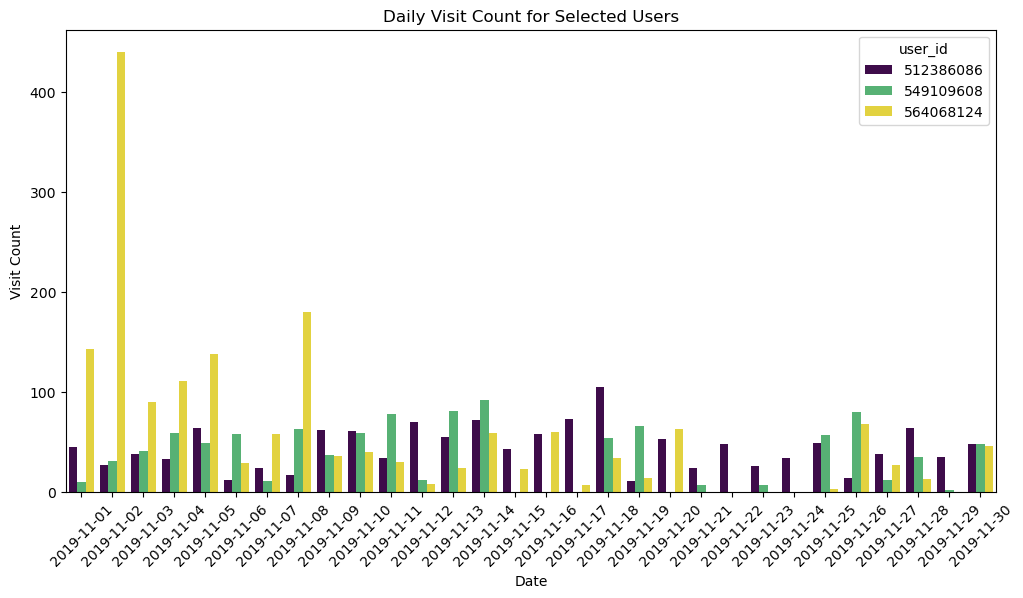

In [56]:
# Distribution of visit dates for specific user_ids

target_user_ids = [564068124, 512386086, 549109608]
filtered_users_df = df[df['user_id'].isin(target_user_ids)]

# Daily count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='date', hue='user_id', data=filtered_users_df, palette='viridis')
plt.xlabel('Date')
plt.ylabel('Visit Count')
plt.title('Daily Visit Count for Selected Users')
plt.xticks(rotation=45)
plt.show()


# Analysis

- **Objective**  
  Examine the visit frequency of the top three purchasers.

- **Expectation**  
  Highly active users would maintain consistent visit patterns, independent of promotional events like Black Friday.

- **Findings**  
  - The top-3 purchasers indeed visited regularly throughout the period.  
  - Some of these users did **not** visit at all during the Black Friday week.

- **Conclusion**  
  Frequent visitors display behavior that is largely **unaffected** by short-term sales promotions.


In [64]:
# Group by user_id and calculate the sum of purchases.
purchase_sum_df = df[df['event_type'] == 'purchase'].groupby('user_id')['price'].sum().reset_index(name='purchase_sum')

# Sort in descending order by the total purchase amount.
sorted_purchase_df = purchase_sum_df.sort_values(by='purchase_sum', ascending=False)

# Display the result
sorted_purchase_df

,user_id,purchase_sum
108664,518514099,203986.07
1338,512386086,161682.49
325243,564068124,131929.20
75136,515715331,117130.12
135366,521230795,111072.35
...,...,...
155186,524830675,0.87
99320,517557126,0.87
153550,524474267,0.83
30060,513378422,0.79


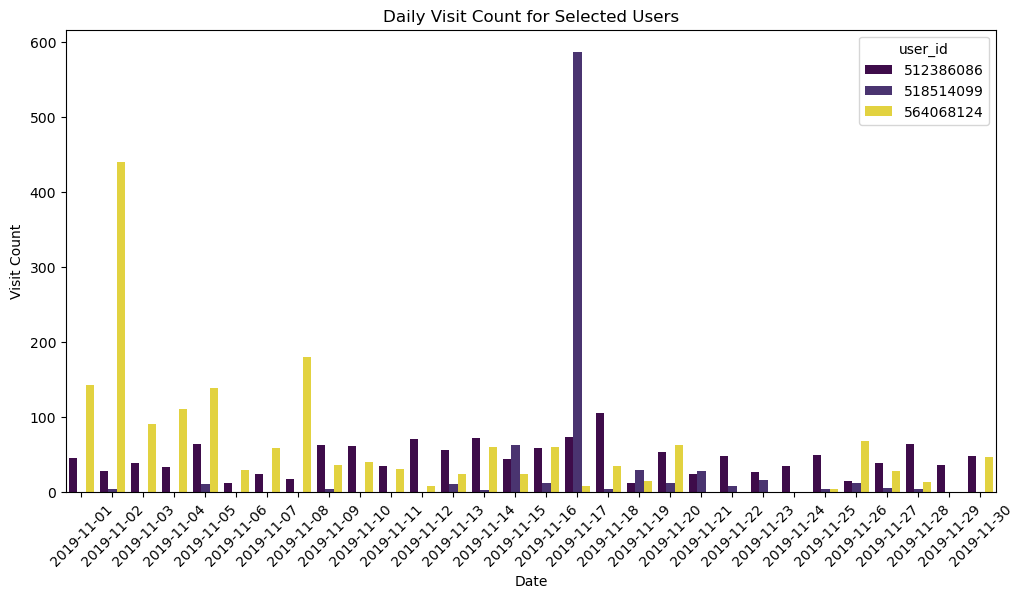

In [66]:
# Distribution of visit dates for specific user_ids
target_user_ids = [518514099, 512386086, 564068124]
filtered_users_df = df[df['user_id'].isin(target_user_ids)]

# Daily Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='date', hue='user_id', data=filtered_users_df, palette='viridis')
plt.xlabel('Date')
plt.ylabel('Visit Count')
plt.title('Daily Visit Count for Selected Users')
plt.xticks(rotation=45)
plt.show()


# Analysis Summary

- **Divergence of Top Spenders vs. Frequent Visitors**  
  - The highest spenders and the most frequent visitors are not the same cohort.  
  - Spending behavior among top spenders is heterogeneous:  
    - Some make small, daily purchases.  
    - Others concentrate transactions during high-impact events (e.g., Black Friday).

- **Temporal Spending Patterns**  
  - Peak spending aligns with promotional events for some users.  
  - Others display steady purchasing irrespective of sales cycles.

- **Decline in Late-Month Visits**  
  - Overall visit counts drop sharply toward the end of November.  
  - Contrary to typical recency assumptions, “fresh” site visits do not correlate strongly with spending volume during this period.

- **Implications**  
  - Marketing and retention strategies should be segmented by user type:  
    - **Event-Driven Buyers:** Target with time-limited offers and reminders leading up to promotions.  
    - **Habitual Buyers:** Engage continuously through loyalty rewards or personalized recommendations.  
  - Late-month engagement initiatives (e.g., targeted email nudges) may be necessary to counteract natural visit decline.  
  - Recency as a standalone metric may be insufficient for predicting high-value transactions; consider combining with user-level spending profiles and purchase cadence.


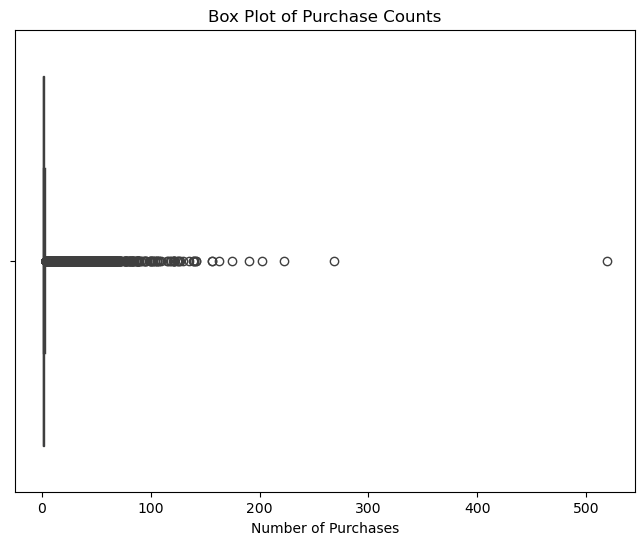

In [69]:
# Filter only the ‘purchase’ rows
purchase_df = df[df['event_type'] == 'purchase']

# Group by `user_id`, count occurrences, then sort in descending order
purchase_counts = purchase_df.groupby('user_id')['event_type'].count().reset_index(name='purchase_count').sort_values(by='purchase_count', ascending=False)

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x=purchase_counts['purchase_count'])
plt.title('Box Plot of Purchase Counts')
plt.xlabel('Number of Purchases')
plt.show()

## Analysis

- The boxplot reveals a compressed interquartile range and a high number of outliers.

- The majority of customers make only a few purchases, while a small subset places exceptionally many orders.

- Although the November Black Friday event may partly explain this, purchase counts over 100 likely reflect inherent behaviors of specific customers.

- It would be wise to segment these heavy purchasers as VIPs and manage them separately from regular customers with tailored strategies.

## Customer Segmentation
- Based on our analyses so far, we want to divide customers into three groups: high spenders, frequent visitors, and everyone else.

- Among high spenders, some were strongly influenced by Black Friday, while others showed consistent spending regardless of promotions.

- In contrast, frequent visitors sometimes did not visit during the Black Friday season, so we cannot treat these two segments identically.

- Recency proved meaningless, since visits declined for all users toward the end of November.

## RFM (Recency, Frequency, Monetary)

In [81]:
# Calculate Recency
max_date = df['event_time'].max()
recency_df = df.groupby('user_id')['event_time'].max().reset_index(name='recency')
recency_df['recency'] = (max_date - recency_df['recency']).dt.days

# Calculate Frequency across various event types
event_types = ['purchase', 'cart', 'view']
frequency_df = df[df['event_type'].isin(event_types)].groupby('user_id')['event_type'].count().reset_index(name='frequency')

# Calculate Monetary value
monetary_df = df[df['event_type'] == 'purchase'].groupby('user_id')['price'].sum().reset_index(name='monetary')

# Create RFM dataframe
rfm_df = pd.merge(recency_df, frequency_df, on='user_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='user_id')

rfm_df

,user_id,recency,frequency,monetary
0,138340325,19,5,93.50
1,225644257,4,17,40.91
2,253299396,24,4,246.85
3,256164170,10,7,113.23
4,267316896,9,13,189.71
...,...,...,...,...
441633,579962677,0,4,1634.38
441634,579963523,0,6,457.91
441635,579964521,0,4,334.60
441636,579966375,0,4,124.11


In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize using only Frequency and Monetary values.
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['frequency', 'monetary']])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_df['cluster'] = kmeans.fit_predict(rfm_scaled)

rfm_df

,user_id,recency,frequency,monetary,cluster
0,138340325,19,5,93.50,0
1,225644257,4,17,40.91,0
2,253299396,24,4,246.85,0
3,256164170,10,7,113.23,0
4,267316896,9,13,189.71,0
...,...,...,...,...,...
441633,579962677,0,4,1634.38,0
441634,579963523,0,6,457.91,0
441635,579964521,0,4,334.60,0
441636,579966375,0,4,124.11,0


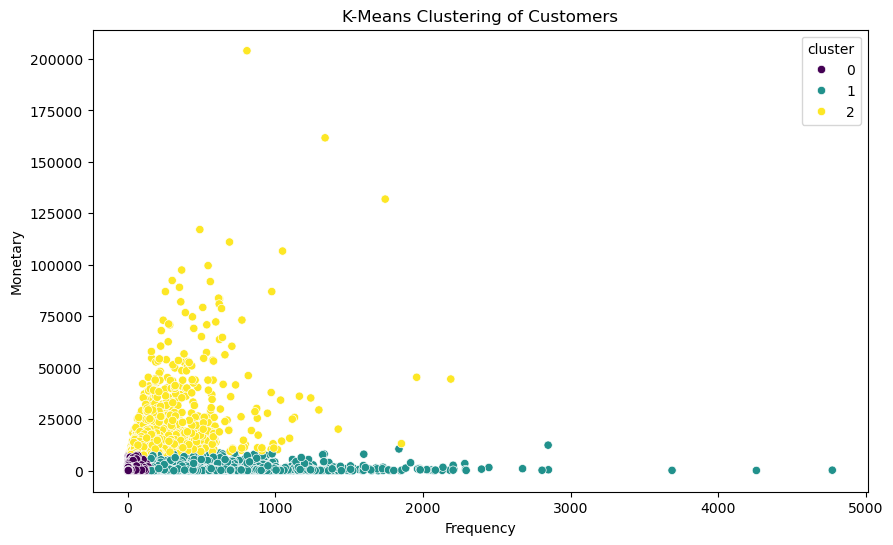

In [85]:
## Visualize clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='frequency', y='monetary', hue='cluster', data=rfm_df, palette='viridis', legend='full')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

## Analysis

The clusters look reasonably well separated on the scatter plot.

- Group 0: Typical customers who neither visit frequently nor spend much.

- Group 1: Customers who don’t visit often but spend very high amounts.

- Group 2: Customers who visit frequently but have relatively lower spending.

